In [2]:
import pandas as pd
import numpy as np 
from urllib.request import urlretrieve
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [15]:
file=pd.read_csv("E:\project.csv",encoding='latin1')

In [16]:
file.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [19]:
file.Country.first_valid_index()

0

In [21]:
file.shape

(9994, 21)

In [22]:
file.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
file.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [34]:
file.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [35]:
file.duplicated().sum()

np.int64(0)

# 1. Overall Sales and Profits
**Q What is the total revenue and profits,and orders?**
We begin by getting an overall sense  of the Revenue


In [39]:
#Total sales and Profit
Overall_sales=file.Sales.sum()
overall_profit=file.Profit.sum()
Total_unique_orders=file['Order ID'].nunique()
print("Overall Sales is ",round(Overall_sales,2))
print("Overall porfit is ",round(overall_profit,2))
print("Total unique orders  is ",Total_unique_orders)

Overall Sales is  2297200.86
Overall porfit is  286397.02
Total unique orders  is  5009


# Total amount of Sales is 2297200.86
# Profit is 286397 approx
Lets see the profit margin next

In [41]:
# Overall profit Margin
Overall_profit_margin=round((overall_profit/Overall_sales)*100,2)
print("The net profit margin is ",Overall_profit_margin,"%")

The net profit margin is  12.47 %


- The overall profit margin of 12.47% is strong for a retail business. This suggests that the company is operating with healthy profitability across its entire product range.


# 2. Average profit ans Sales per order
**Q- What is the profit contributed by each order?**
lets calculate the profit margin for each order too

In [42]:
order_sale=file.groupby('Order ID').Sales.mean().reset_index()
order_sale.columns=['order_id','mean_sale']
order_profit=file.groupby('Order ID').Profit.mean().reset_index()
order_profit.columns=['order_id','mean_profit']
profit_mar_order = round(order_profit['mean_profit'] / order_sale['mean_sale'],2)*100

print('Average sale per order is ',order_sale)
print('Average profit per order is',order_profit)
print('Average profit margin per order is ',profit_mar_order)

Average sale per order is              order_id   mean_sale
0     CA-2014-100006  377.970000
1     CA-2014-100090  349.596000
2     CA-2014-100293   91.056000
3     CA-2014-100328    3.928000
4     CA-2014-100363   10.688000
...              ...         ...
5004  US-2017-168802   18.368000
5005  US-2017-169320   85.715000
5006  US-2017-169488   28.430000
5007  US-2017-169502   56.705000
5008  US-2017-169551  224.139667

[5009 rows x 2 columns]
Average profit per order is             order_id  mean_profit
0     CA-2014-100006   109.611300
1     CA-2014-100090    -9.544500
2     CA-2014-100293    31.869600
3     CA-2014-100328     1.325700
4     CA-2014-100363     3.859600
...              ...          ...
5004  US-2017-168802     5.969600
5005  US-2017-169320     8.336050
5006  US-2017-169488    13.277600
5007  US-2017-169502    16.226350
5008  US-2017-169551   -10.381583

[5009 rows x 2 columns]
Average profit margin per order is  0       29.0
1       -3.0
2       35.0
3       34.0
4  

# 3. lets see the profit and sales accoring to groups and sub groups
**Which Category or Subcategory has highest sales and profit?**
-This will give us a better understanding of sales and what contriutes the most


In [53]:
a=file.groupby('Category')[['Sales','Profit']].sum().sort_values('Sales',ascending=False)
b=file.groupby(['Category','Sub-Category'])[['Sales','Profit']].sum().sort_values('Sales',ascending=False)
print(a)


                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


In [ ]:
b['profit_margin']=round((b.Profit/b.Sales)*100,2)
print(b)


- Therefore technology has highest sales amount as well as the profits
- as we can see above phone contibutes to be the higest sales and profits within technology with a sales of over 300000 and profit of over 40000


In [56]:
c=b.sort_values('profit_margin',ascending=False)
print(c)

                                    Sales      Profit  profit_margin
Category        Sub-Category                                        
Office Supplies Labels         12486.3120   5546.2540          44.42
                Paper          78479.2060  34053.5693          43.39
                Envelopes      16476.4020   6964.1767          42.27
Technology      Copiers       149528.0300  55617.8249          37.20
Office Supplies Fasteners       3024.2800    949.5182          31.40
Technology      Accessories   167380.3180  41936.6357          25.05
Office Supplies Art            27118.7920   6527.7870          24.07
                Appliances    107532.1610  18138.0054          16.87
                Binders       203412.7330  30221.7633          14.86
Furniture       Furnishings    91705.1640  13059.1436          14.24
Technology      Phones        330007.0540  44515.7306          13.49
Office Supplies Storage       223843.6080  21278.8264           9.51
Furniture       Chairs        3284

* Among the office supplies Labels are most profitable with a margin of 44.42%
* Lets see the Overall profit margin by category

In [57]:
d=c.groupby('Category')[['Profit','profit_margin']].mean().sort_values('profit_margin',ascending=False)
print(d)


                       Profit  profit_margin
Category                                    
Office Supplies  13610.088978      24.915556
Technology       36363.737025      19.382500
Furniture         4612.818200       2.690000


* Office Supplies have highest profit margin with average of 25% approx
  

# Small conclusion
- Technology contibutes for the major revenue
- Office supplies are most profitable
  

Text(0.5, 1.0, 'category wise Sales')

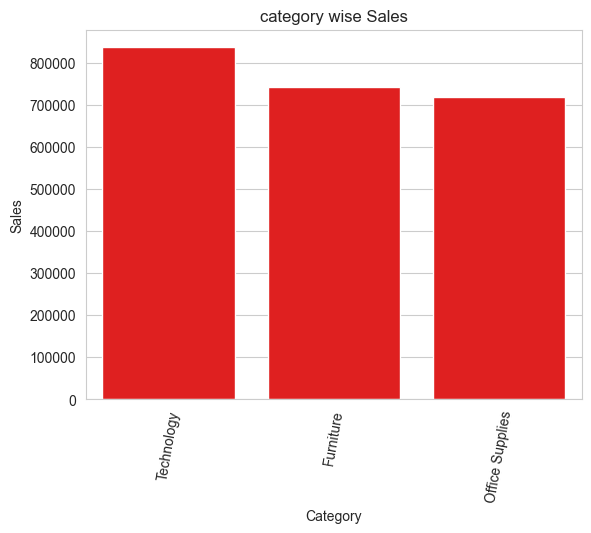

In [61]:
sns.set_style('whitegrid')
sns.barplot(data=a,x='Category',y='Sales',color='red')
plt.xticks(rotation=80)
plt.title('category wise Sales')

## 🔹 4. Sales and Profit by State

**Q: Which states generate the highest sales and profits? Are there states with high sales but low or negative profits?**

Analyzing state-level performance helps identify where the business is thriving and where improvements are needed. This can guide future decisions like marketing focus, pricing, and regional strategy.


In [65]:
# State Wise Sales
state_sales=file.groupby('State')[['Sales','Profit']].sum()
state_sales['profit_margin']=round((state_sales.Profit/state_sales.Sales)*100,2)
state_sales.sort_values('Sales',ascending=False,inplace=True)
state_sales.head(10)


,Sales,Profit,profit_margin
State,,,
California,457687.6315,76381.3871,16.69
New York,310876.2710,74038.5486,23.82
Texas,170188.0458,-25729.3563,-15.12
Washington,138641.2700,33402.6517,24.09
Pennsylvania,116511.9140,-15559.9603,-13.35
Florida,89473.7080,-3399.3017,-3.80
Illinois,80166.1010,-12607.8870,-15.73
Ohio,78258.1360,-16971.3766,-21.69
Michigan,76269.6140,24463.1876,32.07


### ✅ Insight:
- Carlifornia and New York contribute to major sales and major profit
* Some states like Texas and PensylVania has large Sales but have negative profits andd profit_margin
  


# Lets see a state wise sales plot of top 10 States for better clarification


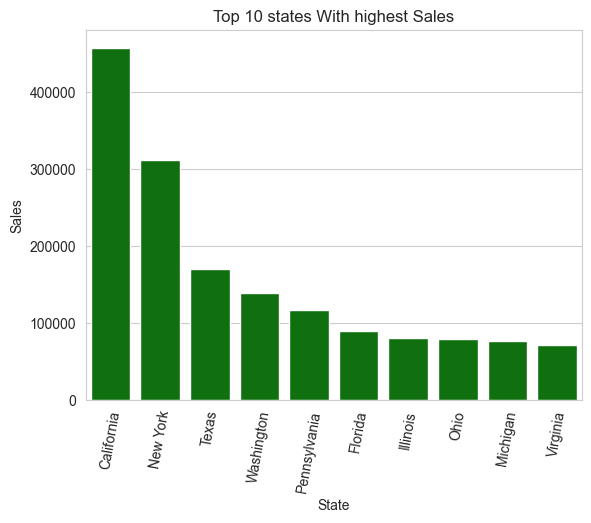

In [71]:
b=state_sales.head(10)
sns.barplot(data=b,x='State',y='Sales',color='green')
plt.title('Top 10 states With highest Sales')
plt.xticks(rotation=80);

## 🔹 5. Relationship Between Discount and Profit

**Q: Does giving a higher discount lead to more profit, or does it reduce profitability?**

Analyzing the relationship between discount and profit helps evaluate pricing strategy and discounting policies. A negative correlation might signal that excessive discounting is harming the bottom line.


In [74]:
profit_discount=file[['Discount','Profit']].corr()


          Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000


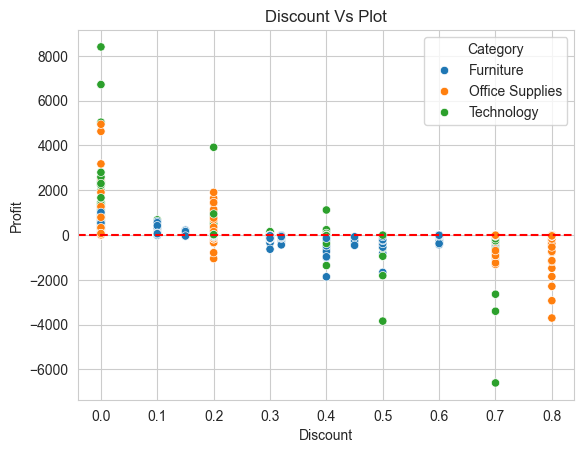

In [76]:
sns.scatterplot(data=file,x='Discount',y='Profit',hue='Category')
plt.title('Discount Vs Plot')
plt.axhline(0, color='red', linestyle='--');


### ✅ Insight:

- The scatter plot shows a **negative correlation** — higher discounts tend to result in **lower profits**.
- Several data points with high discounts show **negative profit**, indicating potential losses.
* items like Office Supplies offer the highest discount
  - Higher discount leads to Less profit and more loss simultaneaouly


# Top 10 prrofitable products
- which product contributes to th emost profit?
- This helps understanding which product makes the most revenue


In [88]:
p_sale=file.groupby('Product Name')[['Sales','Profit']].sum()
p_sale.sort_values('Sales',ascending=False)
p_sale['profit_margin']=round((p_sale.Profit/p_sale.Sales)*100,2)
res=p_sale.head(20)
res.sort_values('Profit',ascending=False,inplace=True)
print(res)

                                                        Sales     Profit  \
Product Name                                                               
3D Systems Cube Printer, 2nd Generation, Magenta    14299.890  3717.9714   
1.7 Cubic Foot Compact "Cube" Office Refrigerators   2706.080   578.6848   
24 Capacity Maxi Data Binder Racks, Pearl            3537.240   536.9025   
#10 White Business Envelopes,4 1/8 x 9 1/2            488.904   223.1408   
24-Hour Round Wall Clock                              487.512   180.0198   
14-7/8 x 11 Blue Bar Computer Printout Paper          422.752   172.9440   
#10- 4 1/8" x 9 1/2" Recycled Envelopes               286.672   115.2806   
12-1/2 Diameter Round Wall Clock                      551.448    91.1088   
#10- 4 1/8" x 9 1/2" Security-Tint Envelopes          146.688    64.8636   
#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envel...    176.288    63.7470   
#10 Self-Seal White Envelopes                         108.682    52.1230   
#6 3/4 Gumme

* As we have seen before ,some have high sales but negative profit and profit margin
* These are the top 20 products having highest profits
* lets plot a bar plot for top 10 products having high profits


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '3D Systems Cube Printer, 2nd Generation, Magenta'),
  Text(1, 0, '1.7 Cubic Foot Compact "Cube" Office Refrigerators'),
  Text(2, 0, '24 Capacity Maxi Data Binder Racks, Pearl'),
  Text(3, 0, '#10 White Business Envelopes,4 1/8 x 9 1/2'),
  Text(4, 0, '24-Hour Round Wall Clock'),
  Text(5, 0, '14-7/8 x 11 Blue Bar Computer Printout Paper'),
  Text(6, 0, '#10- 4 1/8" x 9 1/2" Recycled Envelopes'),
  Text(7, 0, '12-1/2 Diameter Round Wall Clock'),
  Text(8, 0, '#10- 4 1/8" x 9 1/2" Security-Tint Envelopes'),
  Text(9, 0, '#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes')])

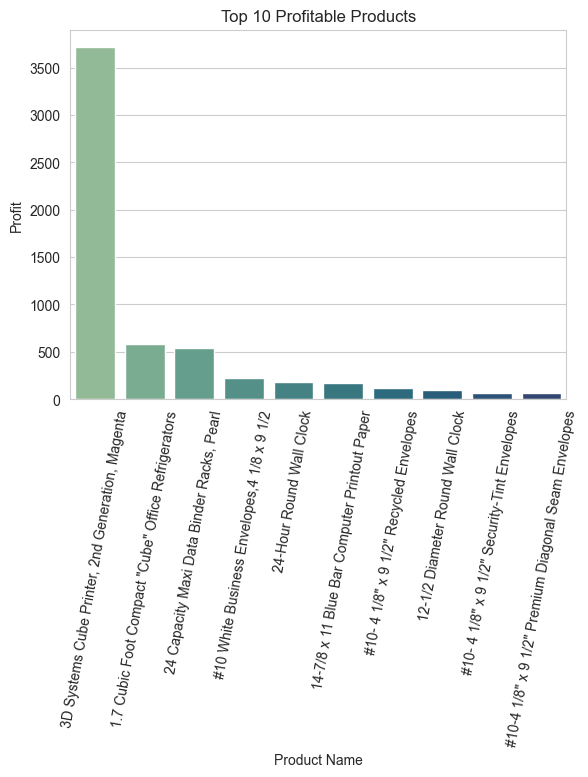

In [93]:
ans=res.head(10)
sns.barplot(data=ans,x='Product Name',y='Profit',palette ='crest')
plt.title("Top 10 Profitable Products")
plt.xticks(rotation=80);

### ✅ Insight:
- These top 10 products are major contributors to profit.
- 3D system Printers are the most profitable products.They generate the most profit



## 📌 Final Insights and Conclusion

- The total sales amounted to approximately **$2.29 million**, with a total profit of around **$286K**, giving an overall profit margin of **~12.5%**.
- **Technology** was the most profitable category, while **Chairs** (under Furniture) had high sales but low profit margins.
- State-wise analysis showed that **California** contributed the highest to sales and profit, whereas states like **Texas** and **Illinois** showed losses.
- There is a **negative correlation between Discount and Profit**, indicating that excessive discounts often lead to financial losses.
- The top 10 most profitable products can guide business focus for marketing and inventory planning.
- Overall, the business seems healthy, but a review of **discounting strategy and product-specific profitability** is recommended.
- The overall Profit and Sales is quite healthy.It just need to take care of the discount-profit Relation.Else its good


In [95]:
file.to_csv('final_cleaned_superstore.csv',index=False)